# Explore here

In [1]:
import pandas as pd
print(pd.__version__)

2.3.3


In [4]:
import pandas as pd
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns

output_dir = "../data/raw"
output_path = os.path.join(output_dir, "AB_NYC_2019.csv")

url = "https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv"

# Descargar el archivo desde la URL
response = requests.get(url)

# Guardar el contenido descargado en el archivo local
with open(output_path, "wb") as f:
    f.write(response.content)



In [5]:
#Conocimiento del dataset
df = pd.read_csv(output_path)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Conocimiento del dataset
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
#Mirar si hay duplicados
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(num_duplicados)

0


In [23]:
#Selección de atributos relevantes
df.drop(["id", "host_name", "last_review", "name"], axis = 1, inplace = True)

df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


### Análisis univariante

In [ ]:
#neighbourhood_group
num_barrios = df['neighbourhood_group'].value_counts()
print(num_barrios)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


<Axes: xlabel='neighbourhood_group'>

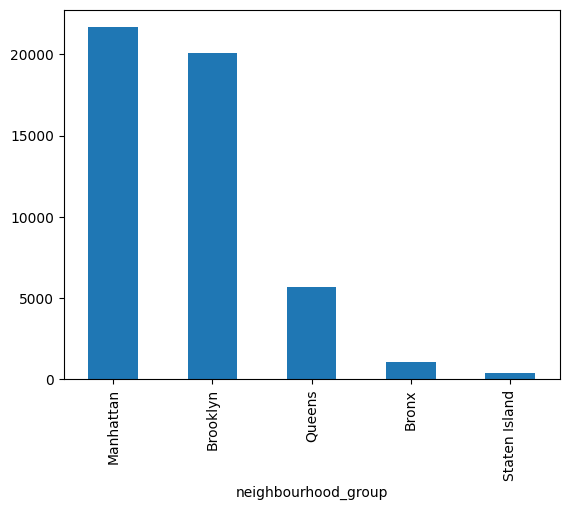

In [14]:
num_barrios.plot(kind='bar')

In [7]:
groups = df['neighbourhood_group'].unique()
for i, group in enumerate(groups):
    sub = df[df['neighbourhood_group'] == group]
    print(group)
    print(sub['price'].describe())
    print('===========')


Brooklyn
count    20104.000000
mean       124.383207
std        186.873538
min          0.000000
25%         60.000000
50%         90.000000
75%        150.000000
max      10000.000000
Name: price, dtype: float64
Manhattan
count    21661.000000
mean       196.875814
std        291.383183
min          0.000000
25%         95.000000
50%        150.000000
75%        220.000000
max      10000.000000
Name: price, dtype: float64
Queens
count     5666.000000
mean        99.517649
std        167.102155
min         10.000000
25%         50.000000
50%         75.000000
75%        110.000000
max      10000.000000
Name: price, dtype: float64
Staten Island
count     373.000000
mean      114.812332
std       277.620403
min        13.000000
25%        50.000000
50%        75.000000
75%       110.000000
max      5000.000000
Name: price, dtype: float64
Bronx
count    1091.000000
mean       87.496792
std       106.709349
min         0.000000
25%        45.000000
50%        65.000000
75%        99.000000

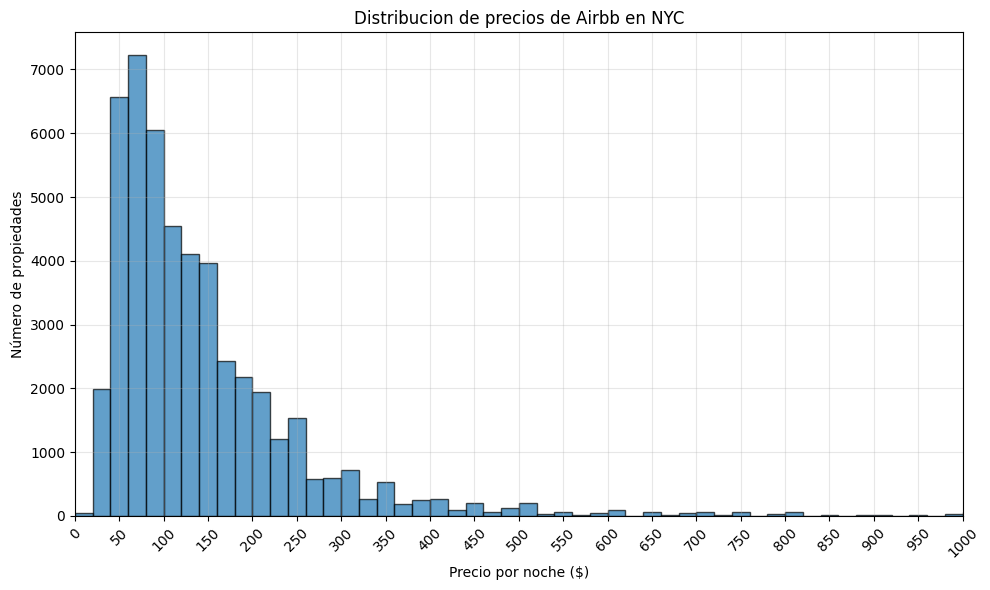

In [ ]:
#Histograma de precios
plt.figure(figsize=(10,6))
plt.hist(df['price'], bins=500, edgecolor= 'black', alpha= 0.7)
plt. title('Distribucion de precios de Airbb en NYC')
plt.xlabel('Precio por noche ($)')
plt.ylabel('Número de propiedades')
plt.xticks(range(0, 1001, 50), rotation=45) 
plt.xlim(0,1000)
plt.grid(True, alpha=0.3)
plt. tight_layout()
plt.show()

Text(0.5, 1.0, 'Ubications map by neighbourhood')

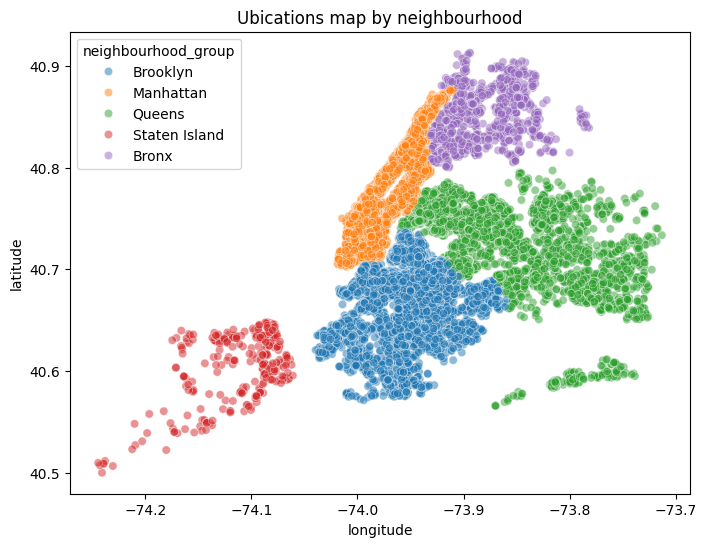

In [48]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='longitude', y='latitude', hue='neighbourhood_group', data=df, alpha=0.5)
plt.title('Ubications map by neighbourhood')

### Análisis multivariante

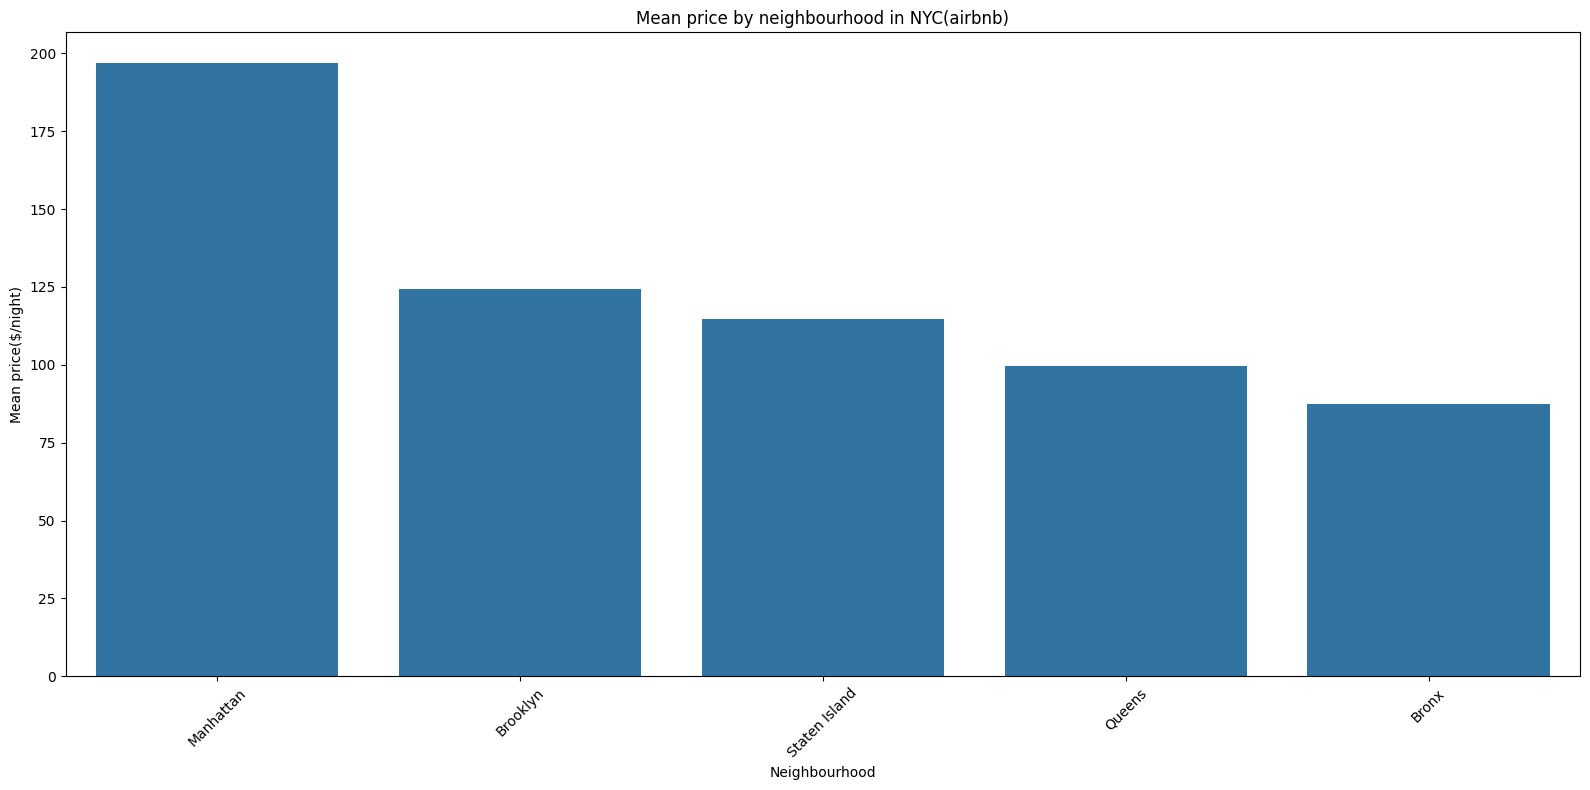

In [ ]:
#Gráfico de barras de la media de precio por barrio
avg_price = df.groupby('neighbourhood_group')['price'].mean().sort_values(ascending = False)

plt.figure(figsize=(16,8))
sns.barplot(x=avg_price.index, y=avg_price.values)

plt.xticks(rotation = 45)
plt.title('Mean price by neighbourhood in NYC(airbnb)')
plt.xlabel('Neighbourhood')
plt.ylabel('Mean price($/night)')
plt.tight_layout()
plt.show()

(0.0, 500.0)

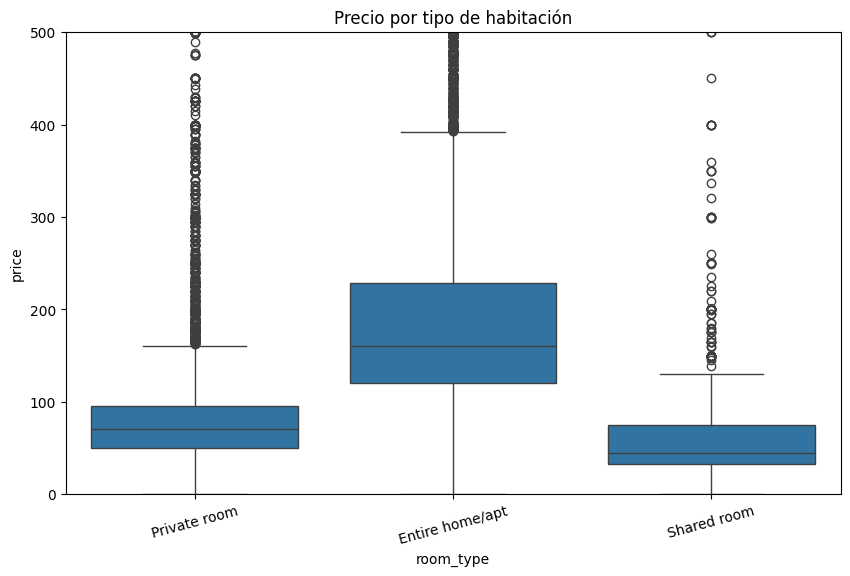

In [16]:
#Boxplot del precio por tipo de habitación
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='room_type', y='price')
plt.title('Precio por tipo de habitación')
plt.xticks(rotation=15)
plt.ylim(0, 500)

In [24]:
df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


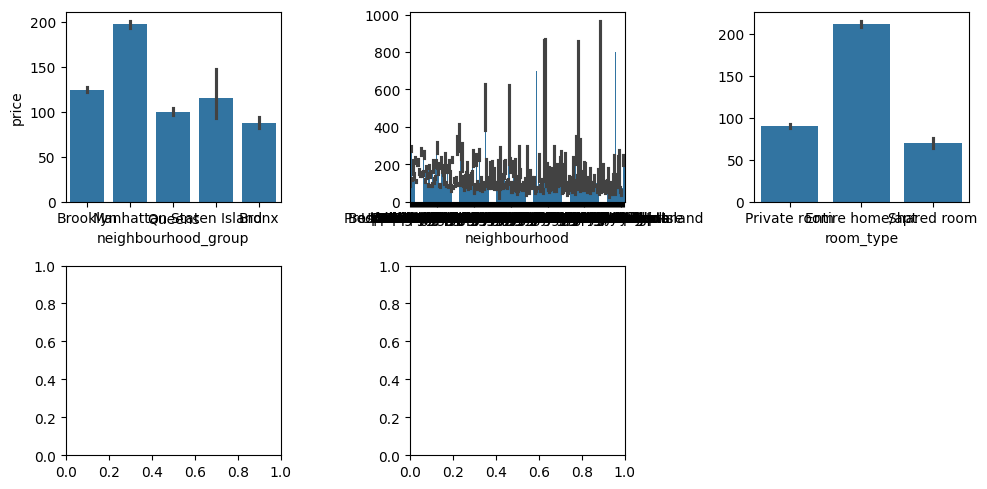

In [28]:
fig, axis = plt.subplots(2, 3, figsize = (10, 5))

sns.barplot(ax = axis[0, 0], data = df, x = "neighbourhood_group", y= "price")
sns.barplot(ax = axis[0, 1], data = df, x = "neighbourhood", y= "price").set(ylabel = None)
sns.barplot(ax = axis[0, 2], data = df, x = "room_type", y= "price").set(ylabel = None)


plt.tight_layout()
fig.delaxes(axis[1, 2])

plt.show()

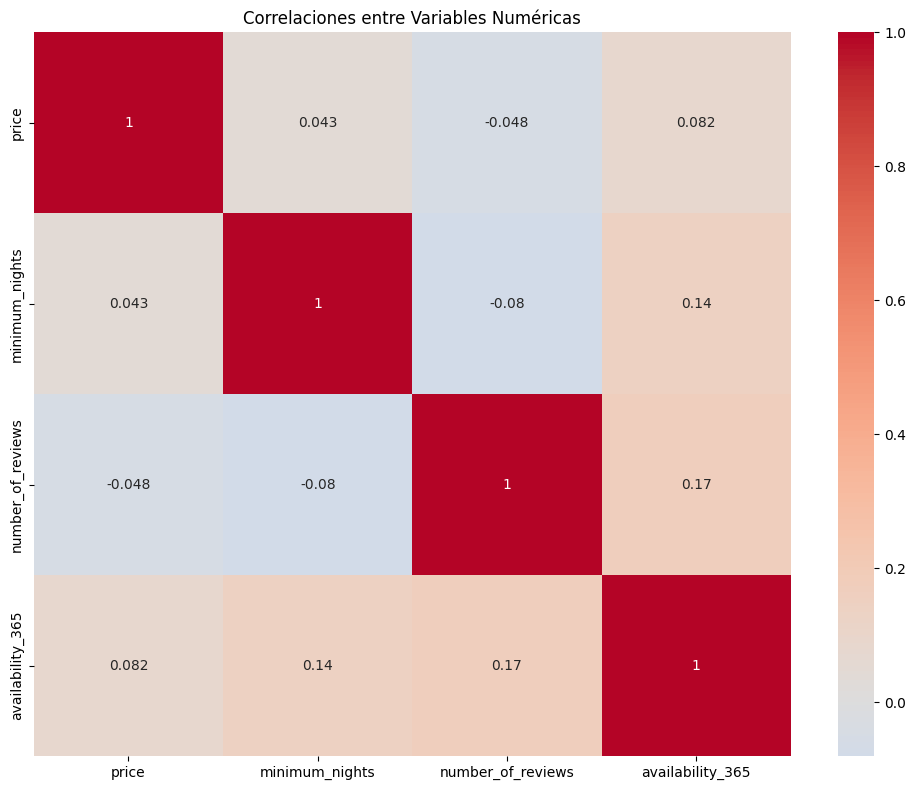

In [ ]:
# Mapa de calor de correlaciones variables numéricas
plt.figure(figsize=(10, 8))
numeric_cols=['price', 'minimum_nights', 'number_of_reviews', 'availability_365']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
plt. title('Correlaciones entre Variables Numéricas')
plt.tight_layout()
plt.show()